<a href="https://colab.research.google.com/github/AYUSH123ak/CSN361/blob/master/Churn_Bank.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**🏦 CUSTOMER CHURN PREDICTION – ABC BANK**

1. Problem Understanding
2. Data Understanding
3. Data Quality Check
4. EDA (Exploratory Data Analysis)
5. Feature Engineering
6. Model / Analysis
7. Evaluation
8. Business Insights

Problem Statement--
Predict whether a customer will leave the bank (churn) and identify the factors that influence customer churn.

*STEP 1 - Import Libraries*

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

*STEP 2 - Dataset Uploading*

In [4]:
df=pd.read_csv('/content/Bank Customer Churn Prediction.csv')
df.head(5)

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


*STEP 3 - Data Understanding*

In [5]:
df.shape
df.info()
df.columns

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 12 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       10000 non-null  int64  
 1   credit_score      10000 non-null  int64  
 2   country           10000 non-null  object 
 3   gender            10000 non-null  object 
 4   age               10000 non-null  int64  
 5   tenure            10000 non-null  int64  
 6   balance           10000 non-null  float64
 7   products_number   10000 non-null  int64  
 8   credit_card       10000 non-null  int64  
 9   active_member     10000 non-null  int64  
 10  estimated_salary  10000 non-null  float64
 11  churn             10000 non-null  int64  
dtypes: float64(2), int64(8), object(2)
memory usage: 937.6+ KB


Index(['customer_id', 'credit_score', 'country', 'gender', 'age', 'tenure',
       'balance', 'products_number', 'credit_card', 'active_member',
       'estimated_salary', 'churn'],
      dtype='object')

👉 Data types:

int = integer

float = decimal

object = text

📌 ML didn't understand text datatype so we need to convert it into integer.

*STEP 4 - Data Quality Check*

check missing values

In [6]:
df.isnull().sum()

,0
customer_id,0
credit_score,0
country,0
gender,0
age,0
tenure,0
balance,0
products_number,0
credit_card,0
active_member,0


no missing values detected.
now checking for the duplicate values.

In [8]:
df.duplicated().sum()

np.int64(0)

no duplicate found

Churn means the customer has stopped using the bank’s services or left the bank.

Churn Value	 = 0  = Customer DID NOT leave the bank

Churn Value	 = 1  = Customer LEFT the bank

*STEP 5 - EDA (Exploratory Data Analysis)*

Now we are going to relationship between Age vs churn, Balance vs churn,Active member vs churn

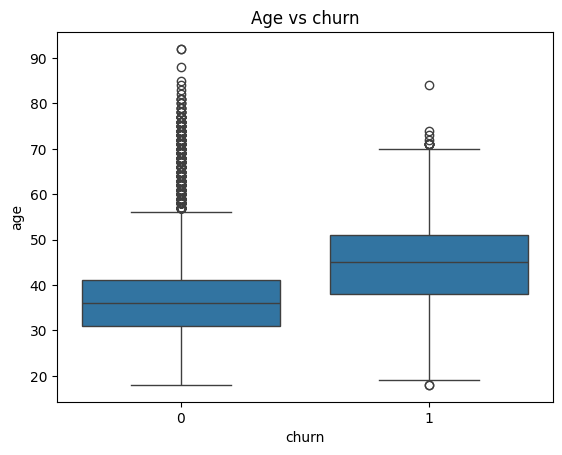

In [18]:
sns.boxplot(y='age',x='churn',data=df)
plt.title("Age vs churn")
plt.show()

📌 Insight:

Older customers churn more

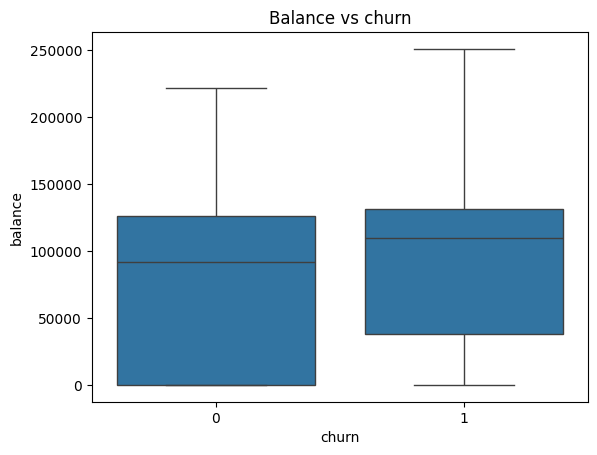

In [19]:
sns.boxplot(y='balance',x='churn',data=df)
plt.title("Balance vs churn")
plt.show()

📌 Insight:

High balance churn which is dangerous for bank

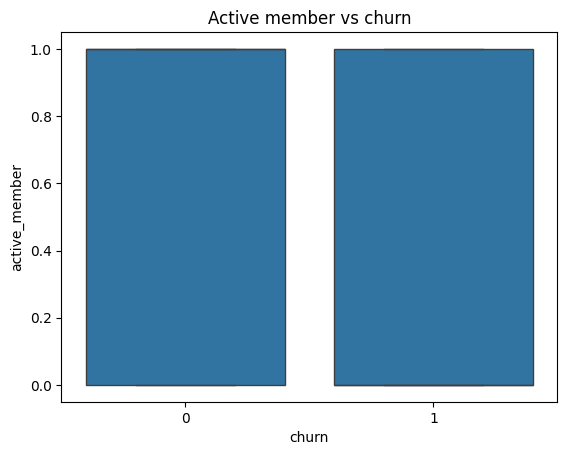

In [20]:
sns.boxplot(y='active_member',x='churn',data=df)
plt.title("Active member vs churn")
plt.show()

📌 Insight:

Inactive customers high risk

*STEP 6 - Feature Engineering*

Feature Engineering is the process of creating new useful columns (features) or modifying existing ones from raw data to improve analysis, insights, or model performance.

In [23]:
df.head()

,customer_id,credit_score,country,gender,age,tenure,balance,products_number,credit_card,active_member,estimated_salary,churn
0,15634602,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,15647311,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,15619304,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,15701354,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,15737888,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


As checked we need to drop the unuseful column and we have to convert gender from text to number and country from text to number

In [24]:
df.drop('customer_id', axis=1, inplace=True)

In [25]:
df['gender']=df['gender'].map({'Male':1,'Female':0})

In [26]:
df = pd.get_dummies(df, columns=['country'], drop_first=True)

Step 7 - FEATURE & TARGET SPLIT

Feature = Input

Target = Output

In [27]:
x = df.drop('churn', axis=1)
y = df['churn']

We have dropped churn column why ?

because to avoid the data leakage of model.

In [28]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(
    x, y,
    test_size=0.2,
    random_state=42,
    stratify=y
)

Terms:

random_state → same result

stratify → churn ratio same

In [29]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

x_train = scaler.fit_transform(x_train)
x_test = scaler.transform(x_test)

📌 Different units = confusion
📌 Scaling mandatory for Logistic Regression

In [31]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(x_train, y_train)


LogisticRegression(max_iter=1000)

📌 Logistic Regression = binary classifier

*Step 8 - Prediction*

In [36]:
y_pred = model.predict(x_test)
y_pred[:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

*Step 9 - Evaluation*

In [41]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

In [42]:
accuracy = accuracy_score(y_test, y_pred)
accuracy

0.808

Matlab:

👉 81% customers ke liye model ne sahi prediction ki

⚠️ But churn problems me accuracy alone enough nahi hoti

In [43]:
cm = confusion_matrix(y_test, y_pred)
cm

array([[1540,   53],
       [ 331,   76]])

In [44]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.82      0.97      0.89      1593
           1       0.59      0.19      0.28       407

    accuracy                           0.81      2000
   macro avg       0.71      0.58      0.59      2000
weighted avg       0.78      0.81      0.77      2000



Metrics:

Precision = correctness

Recall = churn catch

F1 = balance

📌 Churn = Recall important

Step 10 - BUSINESS INSIGHTS

Older, inactive customers with high balances have higher churn probability.
Bank should focus on personalized engagement strategies.